In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("Food_Establishment_Inspection_Data.csv" , low_memory=False)
df.head(1)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0


In [4]:
df["City"] = df["City"].apply(lambda x : x.lower().title() )
df.head(1)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade
0,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0


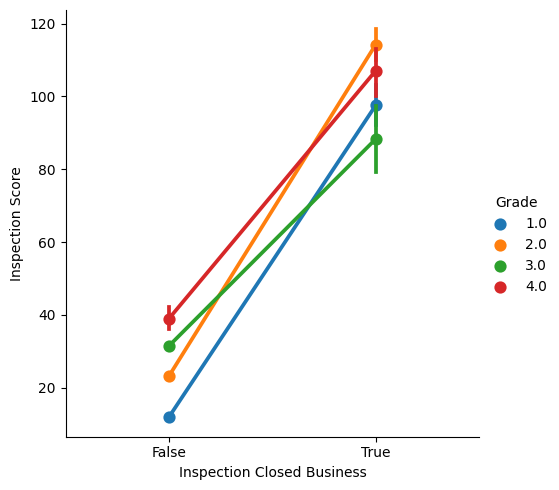

In [94]:
sns.catplot(data= df, x="Inspection Closed Business", y="Inspection Score", hue="Grade", kind="point")

                   شود True آن Inspection Closed Business رستوران هایی که امتیاز بالا کسب میکنند یعنی مرتکب تخلفات بیشتری شده اند که منجر میشود  

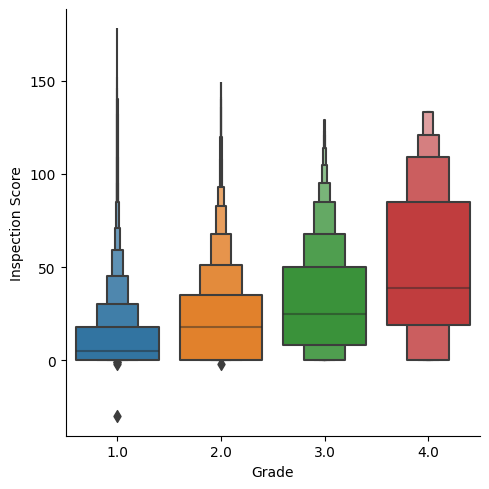

In [4]:
sns.catplot(
    data=df,
    x="Grade", y="Inspection Score", kind="boxen",
)

In [ ]:
  یک دارند با وجود تعداد زیاد ولی از لحاظ امتیاز در وضعیت بهتری هستند Grade به طور کلی رستوران هایی که

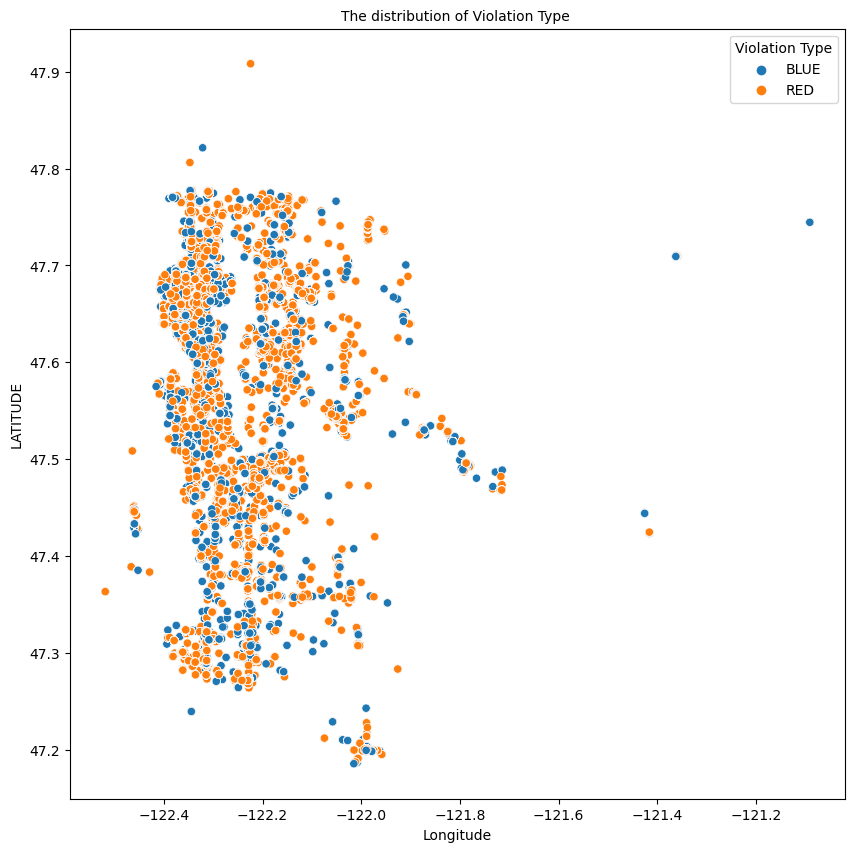

In [21]:
fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(x='Longitude',y='Latitude',hue = 'Violation Type',hue_order= ['BLUE','RED']  ,data= df , ax=ax)
ax.set_title("The distribution of Violation Type ",size=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')
plt.draw()

In [5]:
df['Inspection Date']=pd.to_datetime(df['Inspection Date'])

df['year']=pd.DatetimeIndex(df['Inspection Date']).year
df.head(1)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,year
0,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,2022.0


Text(0.5, 0, '')

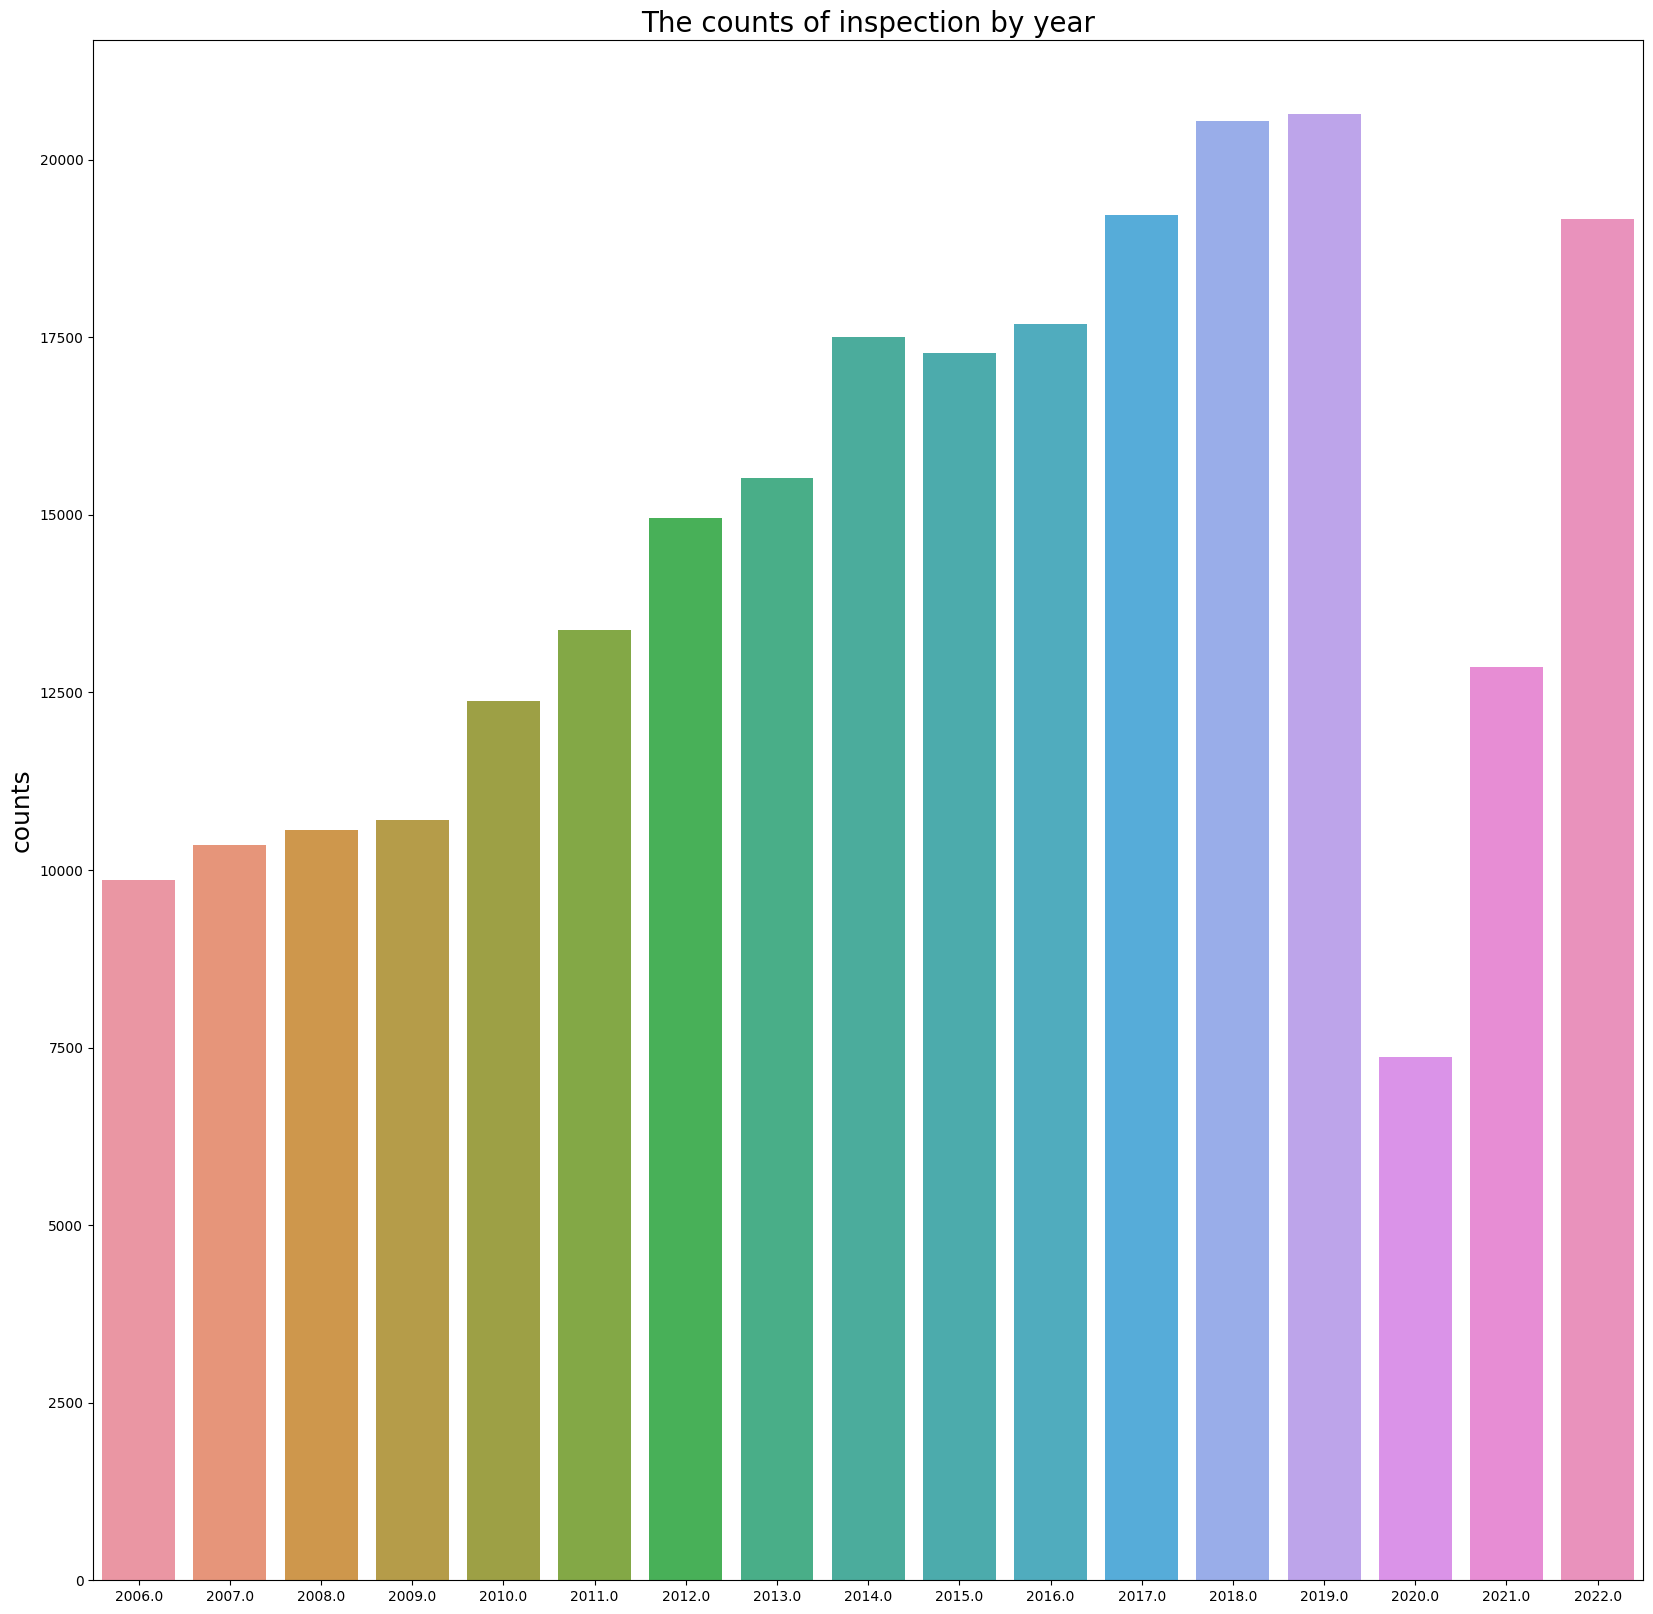

In [106]:
fig,ax=plt.subplots(figsize=(20,20))
x=df.year.value_counts().index
y=df.year.value_counts()
sns.barplot(x=x,y=y,ax=ax)
ax.set_title("The counts of inspection by year",size=20)
ax.set_ylabel('counts',size=18)
ax.set_xlabel('')

In [ ]:
تعداد بازرسی ها در هر سال نشان داده شده است 

In [13]:
dfgrade=df.groupby(['Grade','year'])['Inspection Date'].agg('count').unstack('Grade')
dfgrade

Grade,1.0,2.0,3.0,4.0
year,,,,
2006.0,4991,1773,209,6
2007.0,5243,1844,220,8
2008.0,5389,1958,199,11
2009.0,5613,1941,209,11
2010.0,6563,2281,260,24
2011.0,6891,2579,353,29
2012.0,7698,3044,387,42
2013.0,8024,3262,403,25
2014.0,9048,3826,536,40


Text(0, 0.5, 'counts')

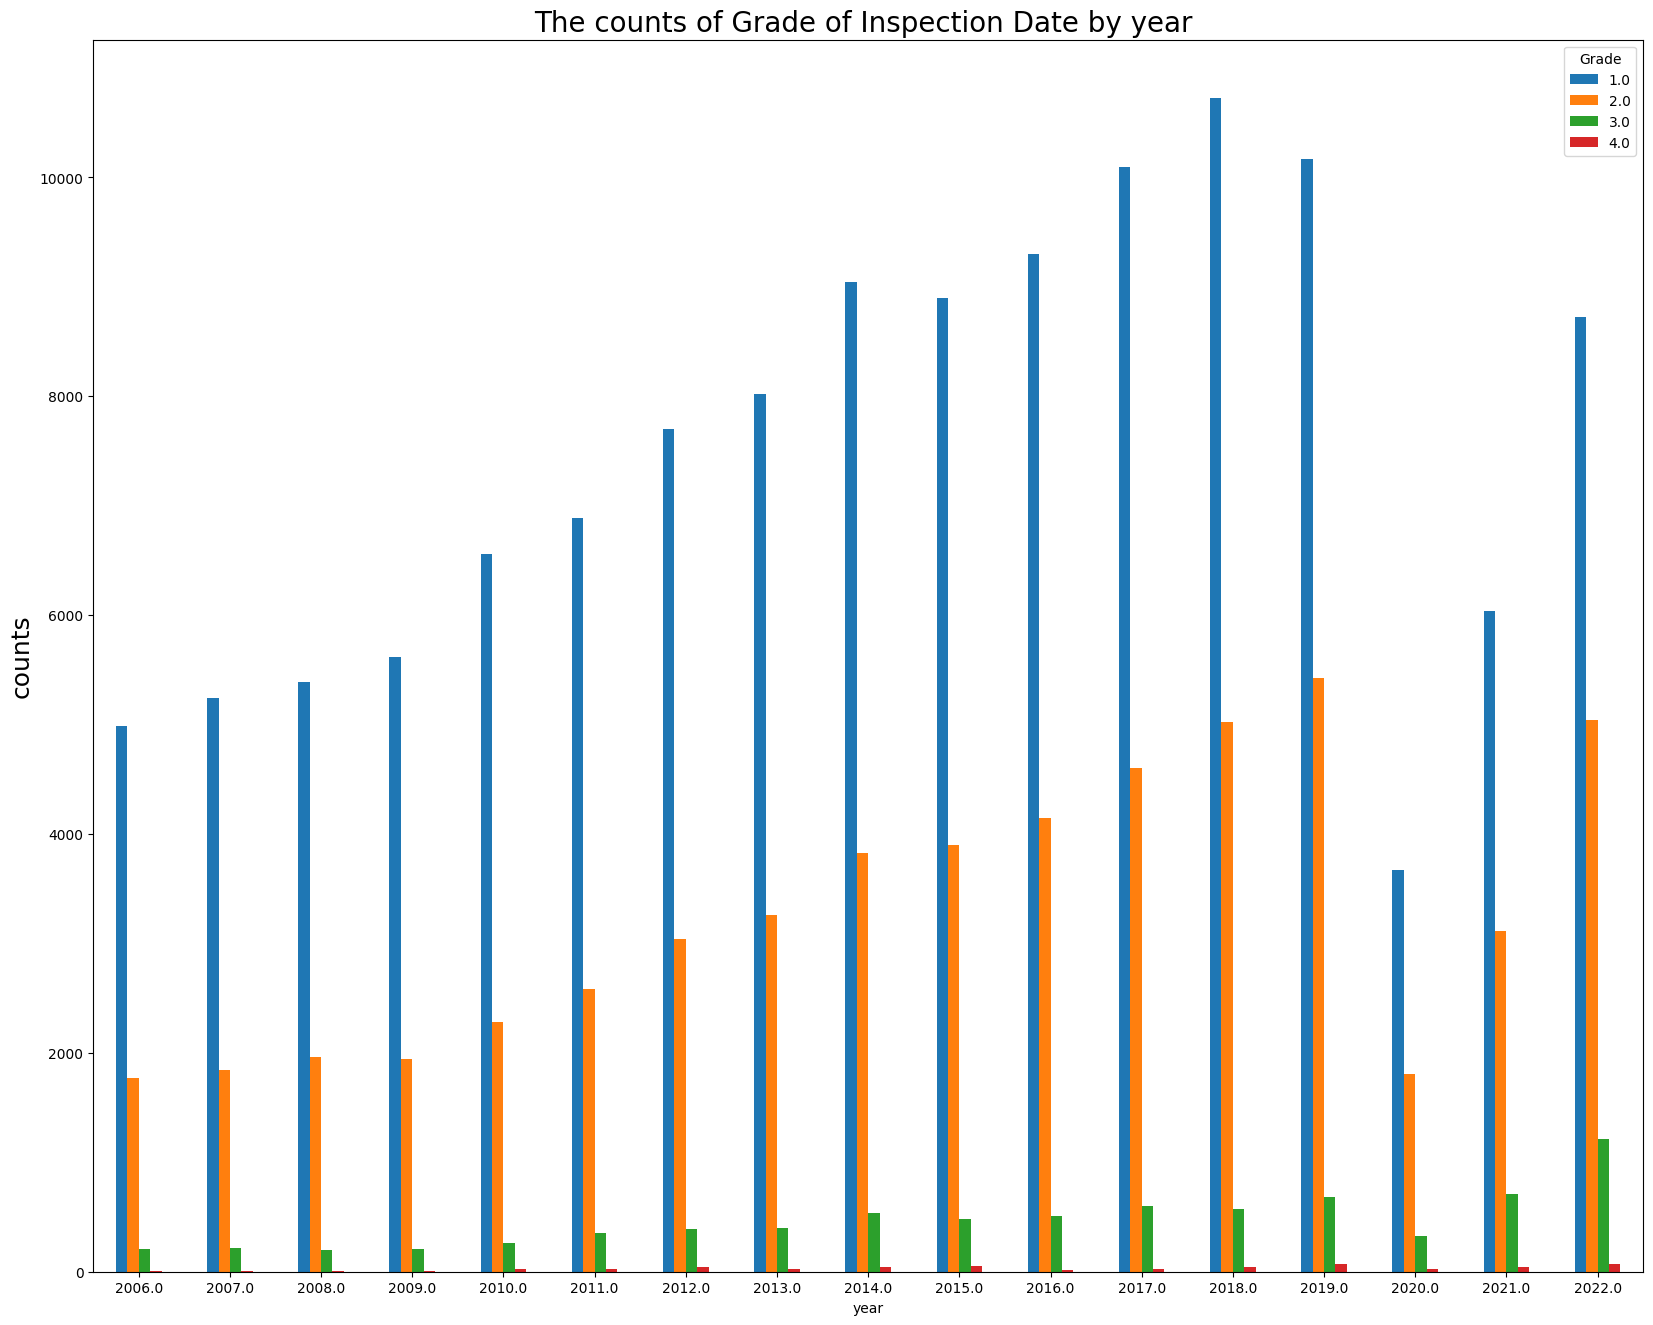

In [14]:
fig,ax=plt.subplots(figsize=(20,16))
dfgrade.plot(kind='bar',ax=ax)
ax.tick_params(axis='x',labelrotation=360)
#ax.legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax.set_title("The counts of Grade of Inspection Date by year ",size=20)
ax.set_ylabel('counts',size=18)

    تعداد بازرسی های انجام شده برای هر گرید در سال را نشان میدهد که با توجه به تعداد گریدهای یک تعداد بازرسی های بیشتری هم دارند 

In [10]:
df_vt=df.groupby(['Violation Type','year'])['Inspection Date'].agg('count').unstack('Violation Type')
df_vt

Violation Type,BLUE,RED
year,,
2006.0,2766,2753
2007.0,2750,2992
2008.0,2625,2798
2009.0,2911,2807
2010.0,3298,3545
2011.0,3164,3824
2012.0,3742,4296
2013.0,3719,4366
2014.0,4402,5900


Text(0, 0.5, 'counts')

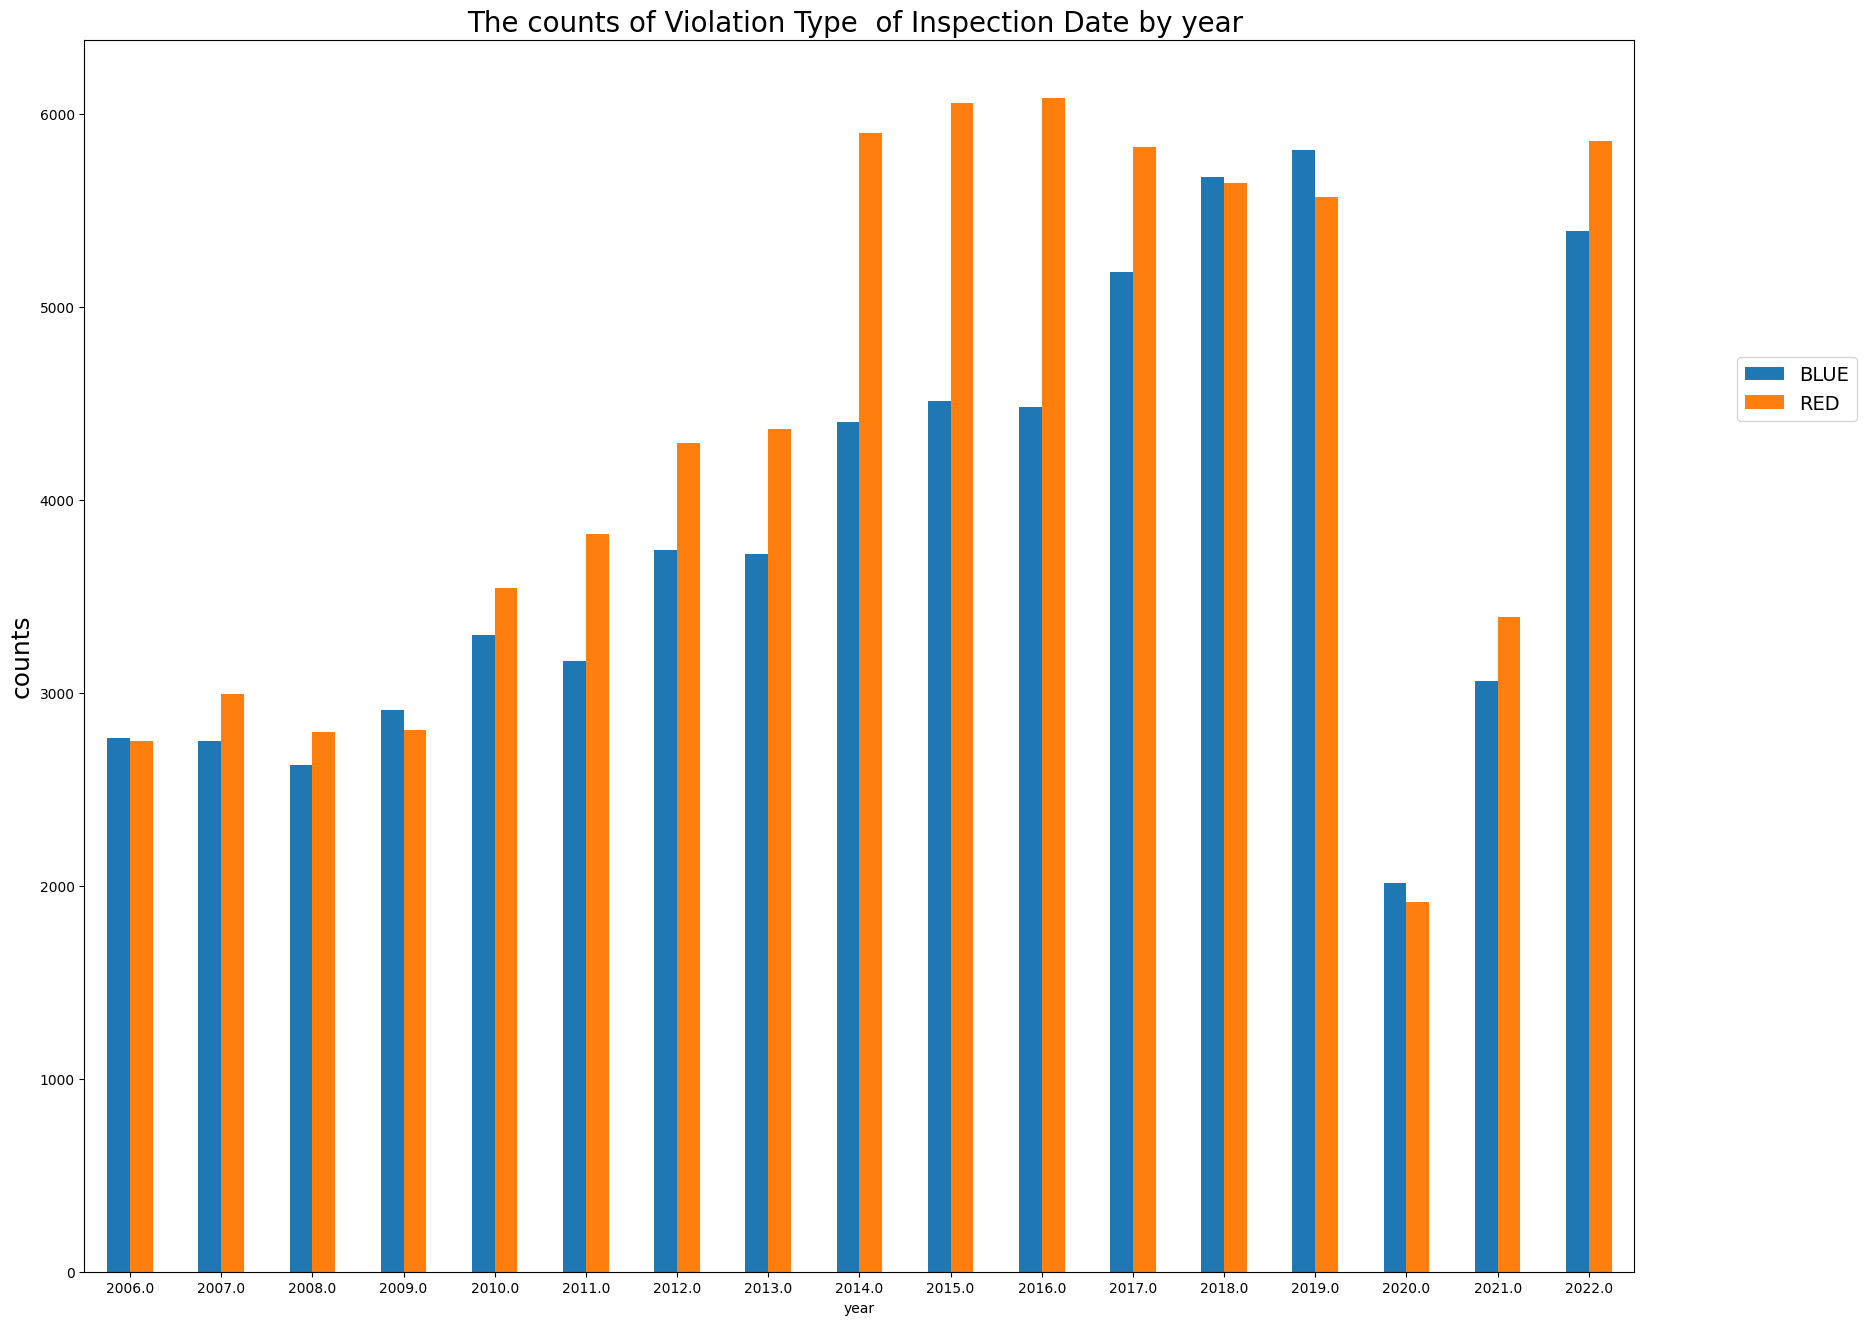

In [159]:
fig,ax=plt.subplots(figsize=(20,16))
df_vt.plot(kind='bar',ax=ax)
ax.tick_params(axis='x',labelrotation=360)
ax.legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax.set_title("The counts of Violation Type  of Inspection Date by year ",size=20)
ax.set_ylabel('counts',size=18)

   در هر سال را نشان میدهد که با توجه به نمودار در سال های 2014 و 2015 و 2016 تفاوت چشمگیری دارند Violation Type تعداد 

In [7]:
df1 =df.groupby(['Grade','Inspection Result']).count().reset_index()
df1.head(1)

,Grade,Inspection Result,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,...,Inspection Type,Inspection Score,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,year
0,1.0,Baseline Data,69,69,69,69,69,69,69,43,...,69,69,69,34,34,69,69,69,34,69


In [8]:
df1['Inspection Result'].unique()

array(['Baseline Data', 'Complete', 'Confirmed', 'In Compliance',
       'Incomplete', 'Increased Knowledge', 'Needs Assessment',
       'No Longer At Location', 'Not Accessible', 'Not Applicable',
       'Not Confirmed', 'Not In Compliance', 'Not Ready For Inspection',
       'Out of Business', 'Satisfactory', 'Unsatisfactory', 'Not Tested',
       'Not Permitted'], dtype=object)

In [11]:
df2 =df.groupby(['Grade','Business_ID','Inspection Type']).count().reset_index()
df2.head(1)

,Grade,Business_ID,Inspection Type,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,...,Inspection Business Name,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Inspection_Serial_Num,Violation_Record_ID,year
0,1.0,PR0001008,Consultation/Education - Field,13,13,13,13,13,13,13,...,13,13,13,13,0,0,13,13,0,13


In [24]:
df3=df.groupby(['Business_ID','Grade'])['Inspection Result'].nunique()

df3.head()


Business_ID  Grade
PR0001008    1.0      5
PR0001010    1.0      3
PR0001011    2.0      3
PR0001012    2.0      3
PR0001013    1.0      3
Name: Inspection Result, dtype: int64

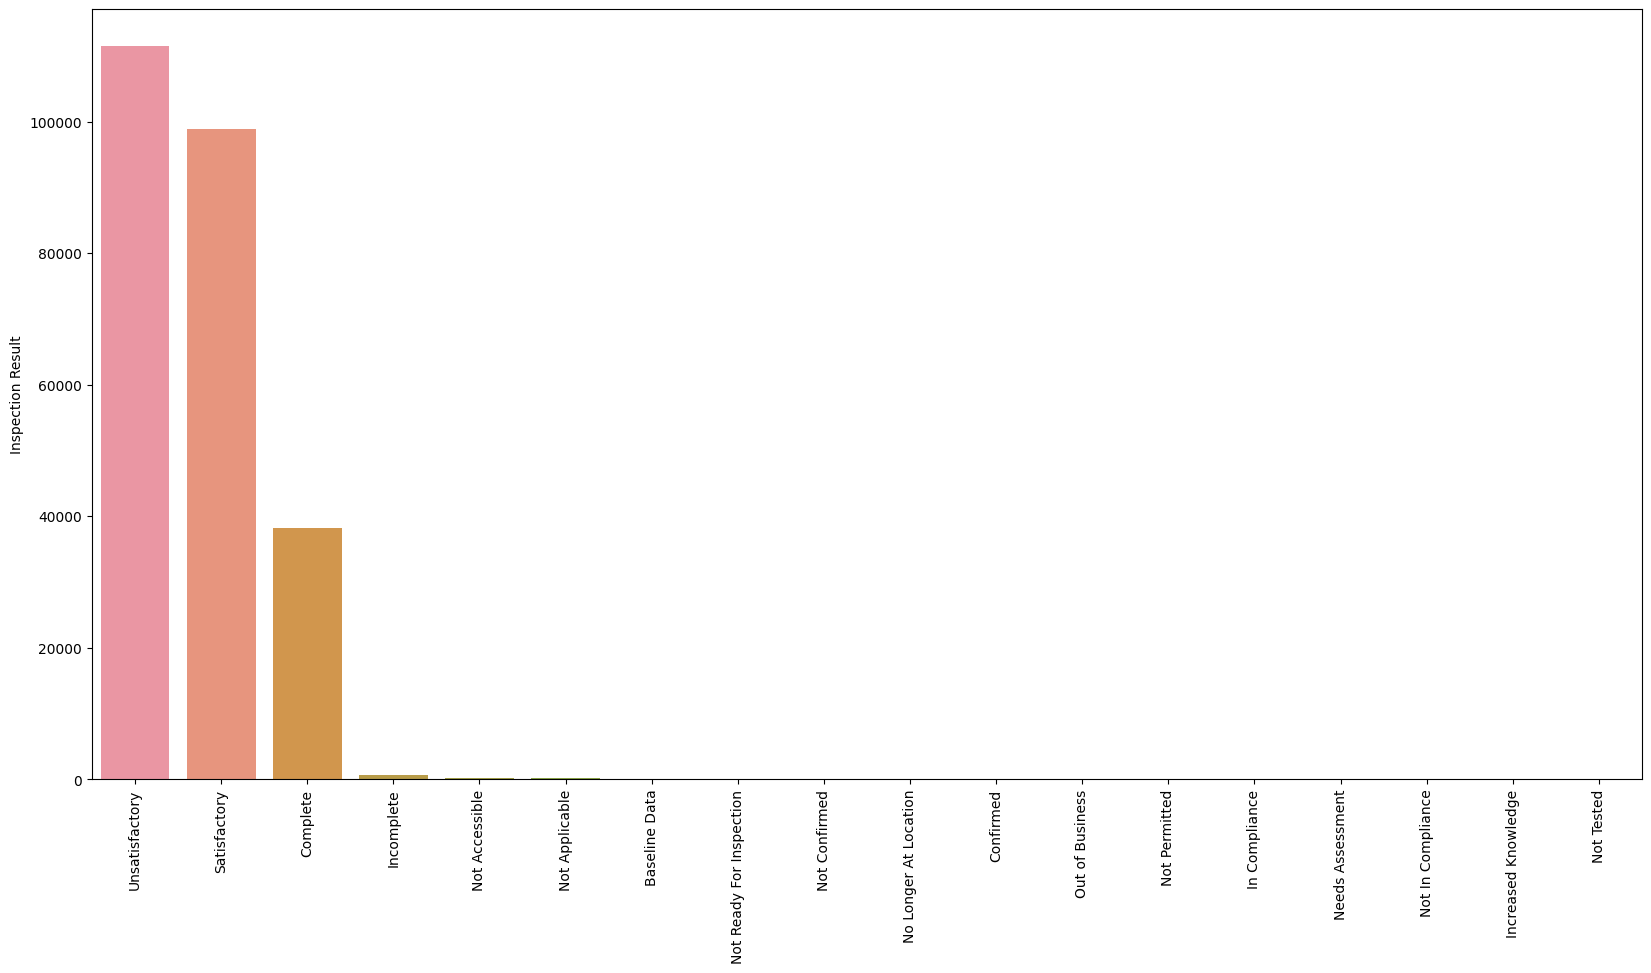

In [142]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
x=df['Inspection Result'].value_counts().index
y=df['Inspection Result'].value_counts()
sns.barplot(x=x,y=y,ax=ax)

ax.tick_params(axis='x', rotation=90)

#fig, ax = plt.subplots(1,1, figsize = (10,5))
#ax = sns.scatterplot(data = df,x = "Inspection Result" , y = "Inspection Score")
plt.draw()

#ax.set_xticks(range(len(ax.get_xticks())));
#ax.set_xticklabels(ax.get_xticklabels() , rotation = 90 );





سه نتیجه پرتکرار بازرسی ها مشاهده میشود

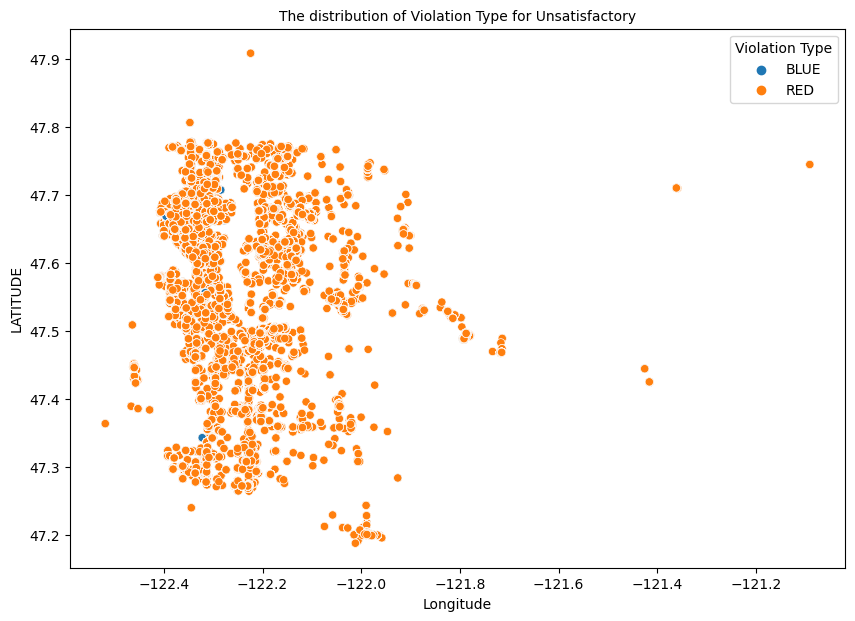

In [146]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(x='Longitude',y='Latitude',hue='Violation Type',hue_order=['BLUE','RED'] ,data= df[df['Inspection Result']=='Unsatisfactory'], ax=ax)
ax.set_title("The distribution of Violation Type for Unsatisfactory",size=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')
plt.draw()




با توجه به نوع تخلف نشان داده شده که تقریبا در همه موارد نوع آن  است   Unsatisfactory نتیجه بازرسی 

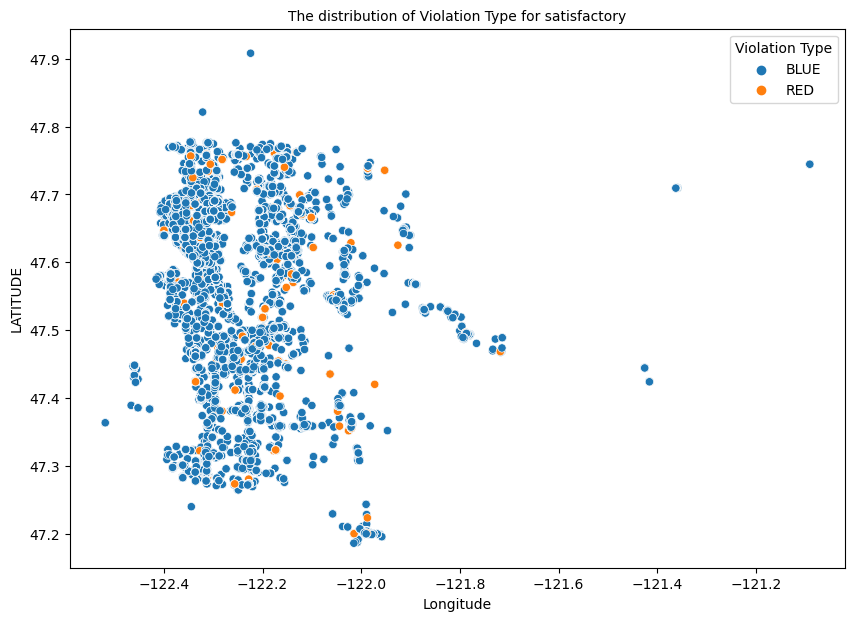

In [148]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(x='Longitude',y='Latitude',hue='Violation Type',hue_order=['BLUE','RED'] ,data= df[df['Inspection Result']=='Satisfactory'], ax=ax)
ax.set_title("The distribution of Violation Type for satisfactory",size=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')
plt.draw()

توزیع نتیجه بازرسی  برای آن نشان داده شده است که نوع تخلف آن نیز با توجه به رنگ آن قابل مشاهده است :Satisfactory 

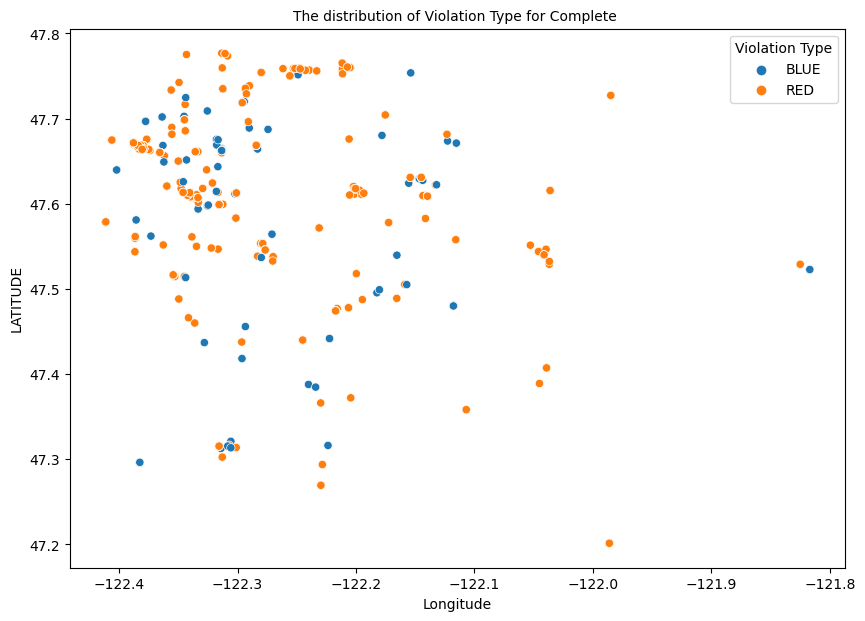

In [150]:
fig,ax=plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(x='Longitude',y='Latitude',hue='Violation Type',hue_order=['BLUE','RED'] ,data= df[df['Inspection Result']=='Complete'], ax=ax)
ax.set_title("The distribution of Violation Type for Complete ",size=10)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')
plt.draw()

 توزیع این نتیجه نشان میدهد مقدارآن نسبت به دو نتیجه دیگر بسیار اندک است : Complete

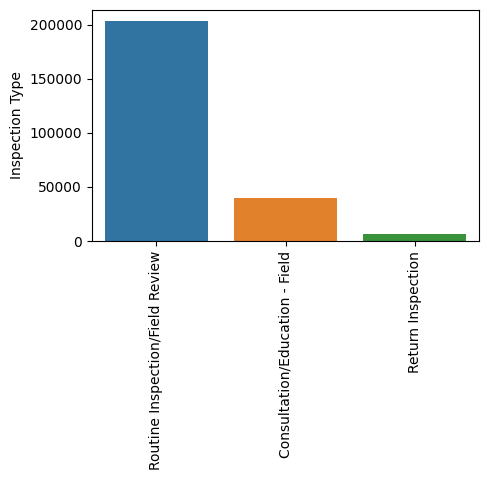

In [152]:
fig,ax=plt.subplots(1,1,figsize=(5,3))
x=df['Inspection Type'].value_counts().index
y=df['Inspection Type'].value_counts()
#ax= sns.barplot(x=x,y=y)
                
ax = sns.barplot(data=df , x = x , y= y)
ax.tick_params(axis='x', rotation=90)

 تعداد آن در هر حالت نشان داده شده است : Inspection Type

In [57]:
dfdf = df.groupby(['year','Inspection Type'])["City"].agg('count').unstack('Inspection Type')
dfdf

Inspection Type,Consultation/Education - Field,Return Inspection,Routine Inspection/Field Review
year,,,
2006.0,1953,192,7714
2007.0,2249,234,7870
2008.0,2361,188,8020
2009.0,2076,130,8491
2010.0,2446,196,9740
2011.0,2626,233,10523
2012.0,3046,396,11519
2013.0,3241,443,11840
2014.0,2963,732,13808


Text(0, 0.5, 'counts')

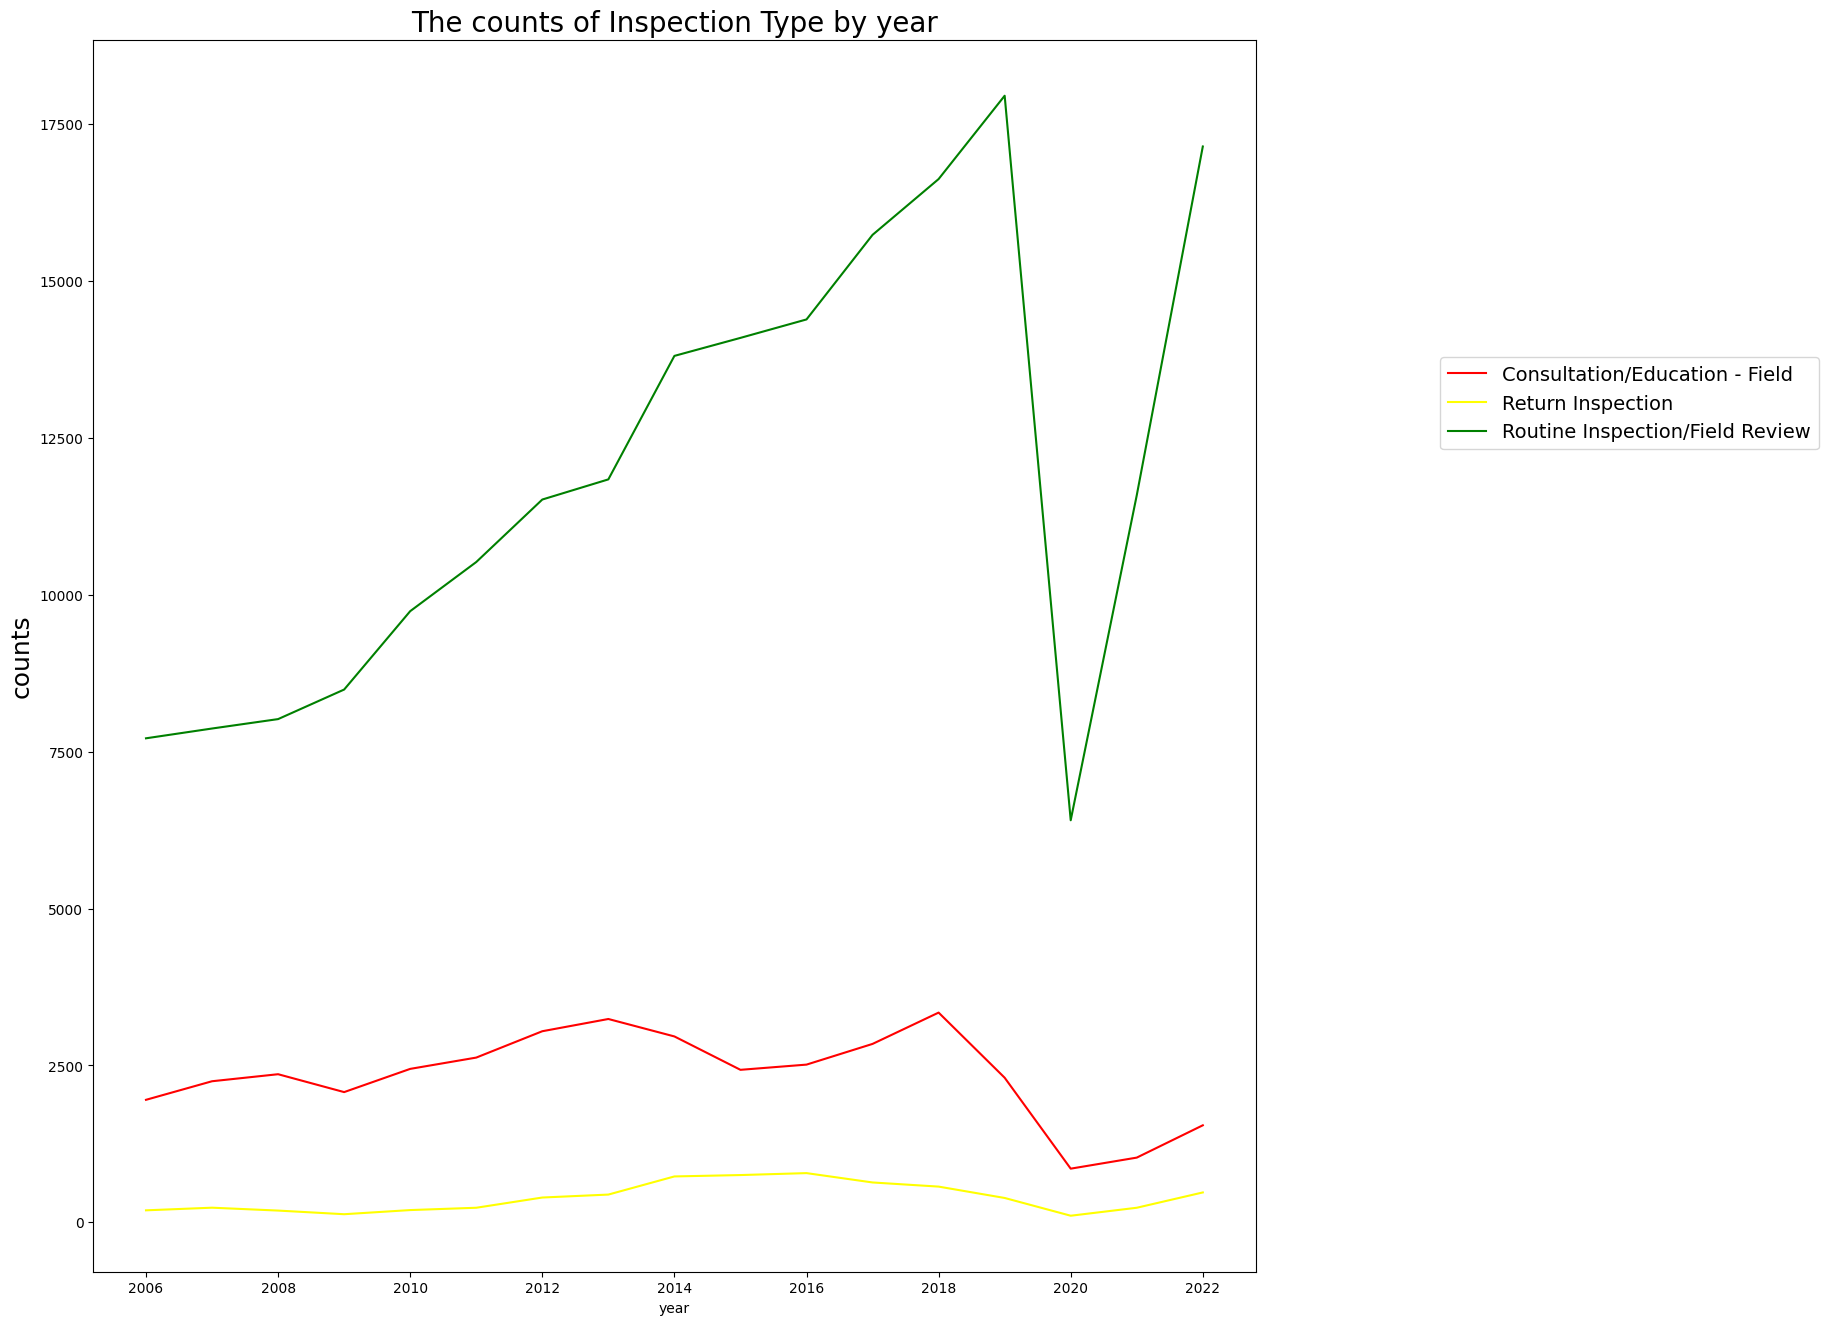

In [65]:
fig,ax=plt.subplots(figsize=(15,16))
dfdf.plot(ax=ax,color=['red','yellow','green'])
ax.legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax.set_title("The counts of Inspection Type by year",size=20)
ax.set_ylabel('counts',size=18)


بررسی هر سه حالت آن برای سال های مختلف نشان داده شده است: Inspection Type

In [12]:
df.groupby(['Inspection Type','Inspection Date'])['Inspection_Serial_Num'].agg('count')

Inspection Type                  Inspection Date
Consultation/Education - Field   01/01/2013          1
                                 01/02/2006          1
                                 01/02/2007          2
                                 01/02/2013          3
                                 01/02/2015          1
                                                    ..
Routine Inspection/Field Review  12/31/2014         27
                                 12/31/2015          7
                                 12/31/2018         34
                                 12/31/2019         27
                                 12/31/2020         20
Name: Inspection_Serial_Num, Length: 11525, dtype: int64

In [123]:
df.groupby(['Inspection Type','Inspection Date'])['Inspection_Serial_Num'].value_counts()

Inspection Type                  Inspection Date  Inspection_Serial_Num
Consultation/Education - Field   01/01/2013       DA2463345                1
                                 01/02/2006       DA1615953                1
                                 01/02/2007       DA1632517                1
                                                  DA1632518                1
                                 01/02/2013       DA2402286                1
                                                                          ..
Routine Inspection/Field Review  12/31/2020       DARYVH6UE                1
                                                  DAT8ML0UN                1
                                                  DAVU5MJJO                1
                                                  DAYRRR98B                1
                                                  DAZ85RHUQ                1
Name: Inspection_Serial_Num, Length: 177125, dtype: int64

In [124]:
df.groupby(['Inspection Result'])['Grade'].value_counts()

KeyError: "None of [Int64Index([   69,    13,     5, 22363,  7504,   949,    49,     1,     1,\n                1,     1,   305,    94,    20,     1,     1,     1,     3,\n               77,    31,     1,   101,    32,    18,     7,     3,     1,\n                1,    46,     9,     3,     1,     1, 51295, 12058,  1215,\n               84, 52800, 35812,  5656,   405],\n           dtype='int64')] are in the [columns]"

In [34]:
df1=df.groupby("Business_ID").nunique().loc[df[df["Latitude"].isna()]["Business_ID"].unique()].sum()
df1

Name                          250
Program Identifier            250
Address                       250
Zip Code                      250
Phone                         247
Longitude                       0
Latitude                        0
Inspection Business Name       87
Inspection Type                97
Inspection Score               99
Inspection Result              98
Inspection Closed Business     87
Violation Type                 32
Violation Description          50
Violation Points              267
Inspection_Serial_Num         140
Violation_Record_ID            56
Grade                          44
capacity                      250
dtype: int64

In [76]:
df[['capacity','Risk_category']]= df['Description'].str.split(" - ",expand=True)

df.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,year,capacity,Risk_category
0,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,2022.0,Seating 0-12,Risk Category III
1,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0,2022.0,Seating 0-12,Risk Category III
2,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0,2022.0,Seating 0-12,Risk Category III
3,#807 TUTTA BELLA,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,NaN,NaN,0,PR0089260,DAUHM2FT8,NaN,1.0,2021.0,Seating 0-12,Risk Category III
4,+MAS CAFE,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,(206) 491-4694,-122.334587,47.648180,...,NaN,NaN,0,PR0046367,DATSWIPUS,NaN,2.0,2022.0,Seating 0-12,Risk Category III


In [45]:
df["Risk_category"].unique()


array(['Risk Category III', 'Risk Category I', 'Risk Category II',
       'no permanent plumbing', 'Risk II'], dtype=object)

In [71]:
df_risk1=df[df['Risk_category']=='Risk Category I']
df_risk1.head(1)

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,capacity,Risk_category
21,100 PERCENT NUTRICION,100 PERCENT NUTRICION,09/02/2021,Seating 0-12 - Risk Category I,3700 NE 4TH ST,Renton,98056,(206) 432-7381,-122.169114,47.488797,...,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0087578,DAQI4H50B,IVP9YZNP0,3.0,Seating 0-12,Risk Category I


در سه نمودار زیر   10 شهر که بیشترین تعداد ریسک ها را براساس نوع آن داشته اند میبینیم  

Text(0.5, 1.0, 'Top 10 City Type by the counts of risk 1')

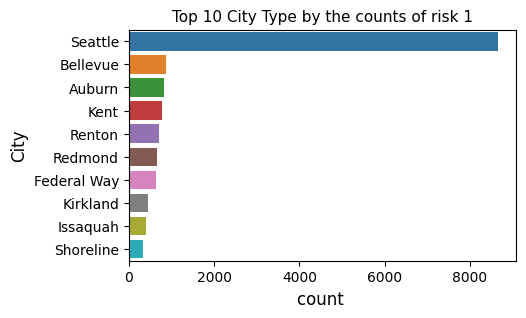

In [75]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.barplot(ax = ax ,x=df_risk1['City'].value_counts()[:10],y=df_risk1['City'].value_counts()[:10].index)

ax.set_xlabel( "count " , size = 12 )
ax.set_ylabel( "City" , size = 12 )
ax.set_title( "Top 10 City Type by the counts of risk 1" , size = 11)

In [72]:
df_risk2=df[df['Risk_category']=='Risk Category II']


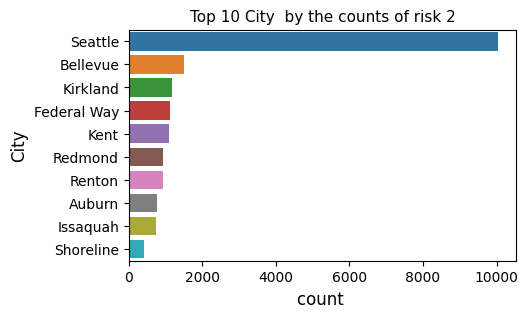

In [74]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.barplot(ax = ax ,x=df_risk2['City'].value_counts()[:10],y=df_risk2['City'].value_counts()[:10].index)

ax.set_xlabel( "count " , size = 12 )
ax.set_ylabel( "City" , size = 12 )
ax.set_title( "Top 10 City  by the counts of risk 2" , size = 11 )
plt.show()

In [76]:
df_risk3=df[df['Risk_category']=='Risk Category III']

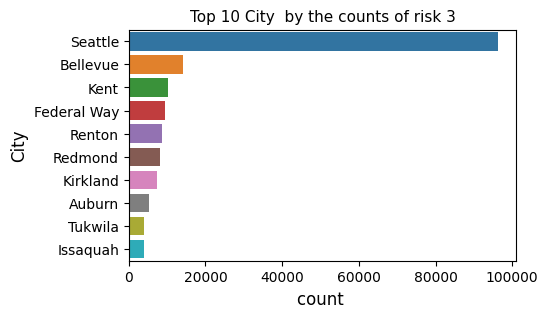

In [77]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))
sns.barplot(ax = ax ,x=df_risk3['City'].value_counts()[:10],y=df_risk3['City'].value_counts()[:10].index)

ax.set_xlabel( "count " , size = 12 )
ax.set_ylabel( "City" , size = 12 )
ax.set_title( "Top 10 City  by the counts of risk 3" , size = 11 )
plt.show()

In [78]:
df["City"].unique()

array(['Seattle', 'Renton', 'Redmond', 'Kent', 'Bellevue', 'Kenmore',
       'Issaquah', 'Woodinville', 'Kirkland', 'Des Moines', 'Burien',
       'Maple Valley', 'Auburn', 'Bothell', 'Federal Way', 'Tukwila',
       'Enumclaw', 'Shoreline', 'Black Diamond', 'Snoqualmie',
       'Lake Forest Park', 'Covington', 'Sammamish', 'Mercer Island',
       'North Bend', 'Duvall', 'Newcastle', 'Sea Tac', 'Vashon Island',
       'Seatac', 'Pacific', 'Normandy Park', 'Fall City',
       'Snoqualmie Pass', 'Buckley', 'Clyde Hill', 'Snohomish',
       'Carnation', 'Vashon', 'Algona', 'Bellingham', 'Skykomish',
       'Tacoma', 'Lynnwood', 'Puyallup', 'Hobart', 'Mount Vernon',
       'Everett', 'Ravensdale', 'Lakewood', 'Medina', 'West Seattle',
       'Preston', 'Mukilteo', 'Parkland', 'Baring'], dtype=object)

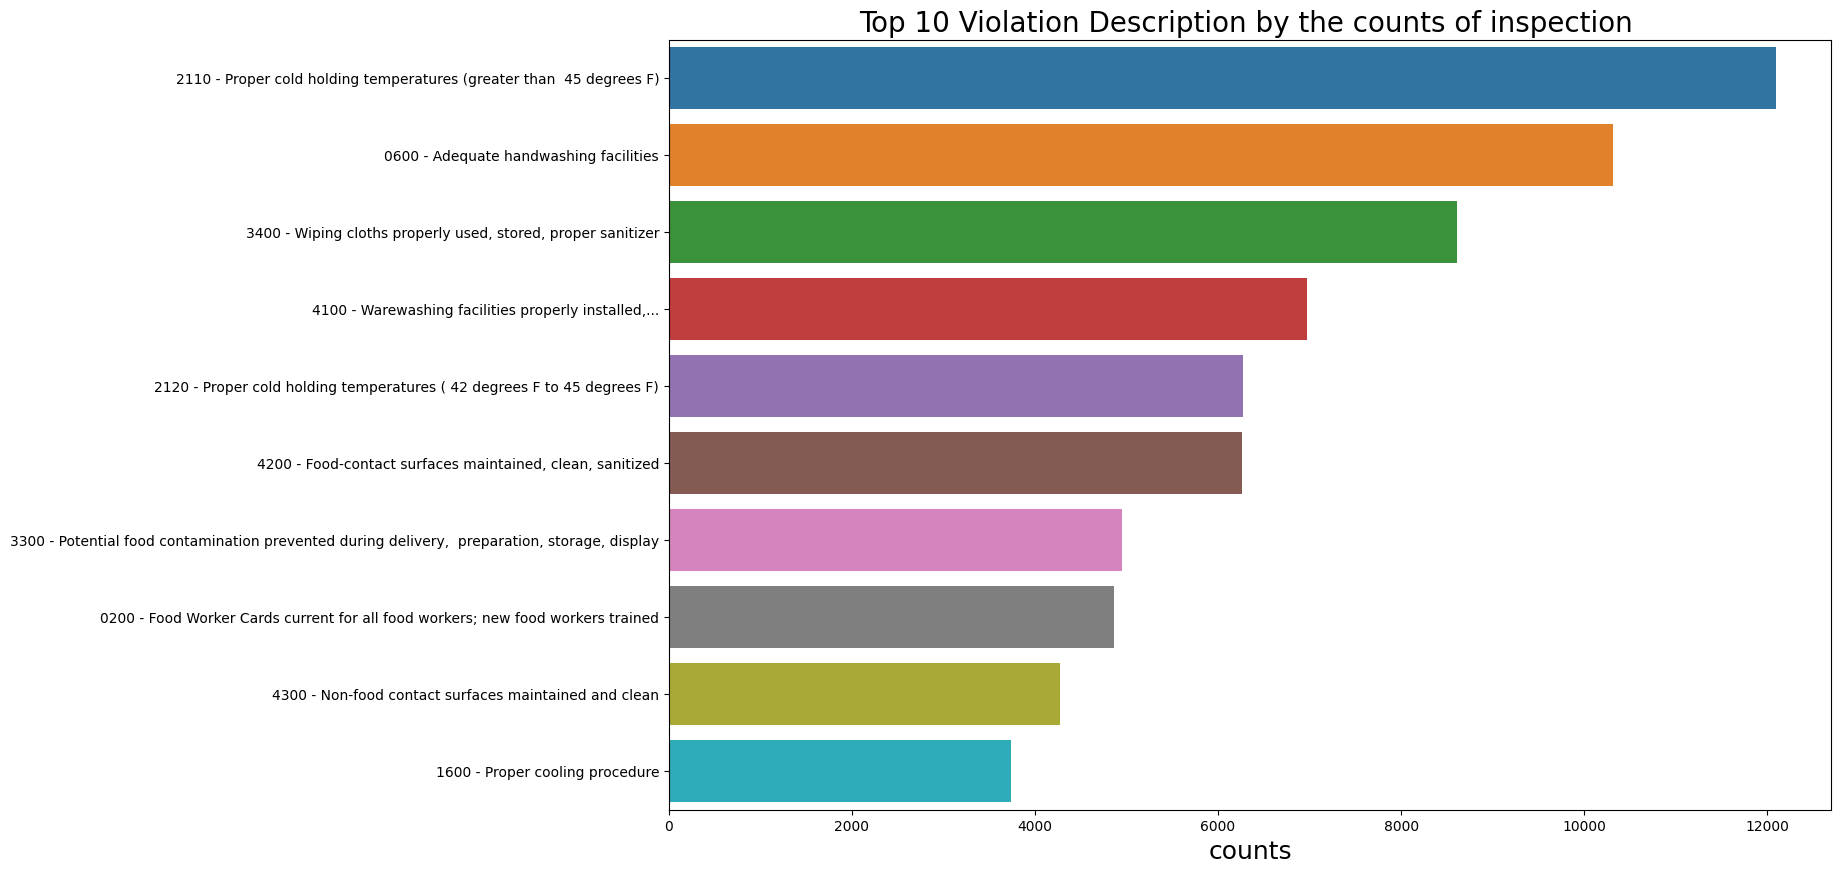

In [72]:
fig,ax=plt.subplots(figsize=(15,10))
y=df['Violation Description'].value_counts()[:10].index
x=df['Violation Description'].value_counts()[:10]
sns.barplot(x=x,y=y,ax=ax)
ax.set_title("Top 10 Violation Description by the counts of inspection ",size=20)
ax.set_xlabel('counts',size=18)
ax.set_ylabel('', size = 51)
plt.show()

 ده تای پرتکرار:Violation Description

In [77]:
data1 = df[df["City"]=='Seattle']
data1

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,year,capacity,Risk_category
0,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,2022.0,Seating 0-12,Risk Category III
1,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0,2022.0,Seating 0-12,Risk Category III
2,#807 TUTTA BELLA,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0,2022.0,Seating 0-12,Risk Category III
3,#807 TUTTA BELLA,#807 TUTTA BELLA,2021-01-06,Seating 0-12 - Risk Category III,2746 NE 45TH ST,Seattle,98105,(206) 722-6400,-122.296415,47.662311,...,NaN,NaN,0,PR0089260,DAUHM2FT8,NaN,1.0,2021.0,Seating 0-12,Risk Category III
4,+MAS CAFE,+MAS CAFE,2022-07-13,Seating 0-12 - Risk Category III,1906 N 34TH ST,Seattle,98103,(206) 491-4694,-122.334587,47.648180,...,NaN,NaN,0,PR0046367,DATSWIPUS,NaN,2.0,2022.0,Seating 0-12,Risk Category III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250752,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2019-05-30,Seating 0-12 - Risk Category III,11752 15TH AVE NE,Seattle,98125,(415) 385-1379,-122.312056,47.715359,...,NaN,NaN,0,PR0086991,DAM35LI6T,NaN,2.0,2019.0,Seating 0-12,Risk Category III
250753,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2018-11-21,Seating 0-12 - Risk Category III,11752 15TH AVE NE,Seattle,98125,(415) 385-1379,-122.312056,47.715359,...,NaN,NaN,0,PR0086991,DAJ0G4RNT,NaN,2.0,2018.0,Seating 0-12,Risk Category III
250754,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2018-05-09,Seating 0-12 - Risk Category III,11752 15TH AVE NE,Seattle,98125,(415) 385-1379,-122.312056,47.715359,...,NaN,NaN,0,PR0086991,DASIXMJAV,NaN,2.0,2018.0,Seating 0-12,Risk Category III
250755,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2017-11-27,Seating 0-12 - Risk Category III,11752 15TH AVE NE,Seattle,98125,(415) 385-1379,-122.312056,47.715359,...,NaN,NaN,0,PR0086991,DA3OGNCPY,NaN,2.0,2017.0,Seating 0-12,Risk Category III


In [91]:
data1=data1.dropna(subset=['Latitude','Longitude','Risk_category'])
data1.isnull().sum()


Name                              0
Program Identifier                0
Inspection Date                 255
Description                       0
Address                           0
City                              0
Zip Code                          0
Phone                         26405
Longitude                         0
Latitude                          0
Inspection Business Name        255
Inspection Type                 255
Inspection Score                273
Inspection Result               255
Inspection Closed Business      255
Violation Type                49420
Violation Description         49420
Violation Points                  0
Business_ID                       0
Inspection_Serial_Num           255
Violation_Record_ID           49420
Grade                         24265
year                            255
capacity                          0
Risk_category                     0
dtype: int64

Text(0, 0.5, 'LATITUDE')

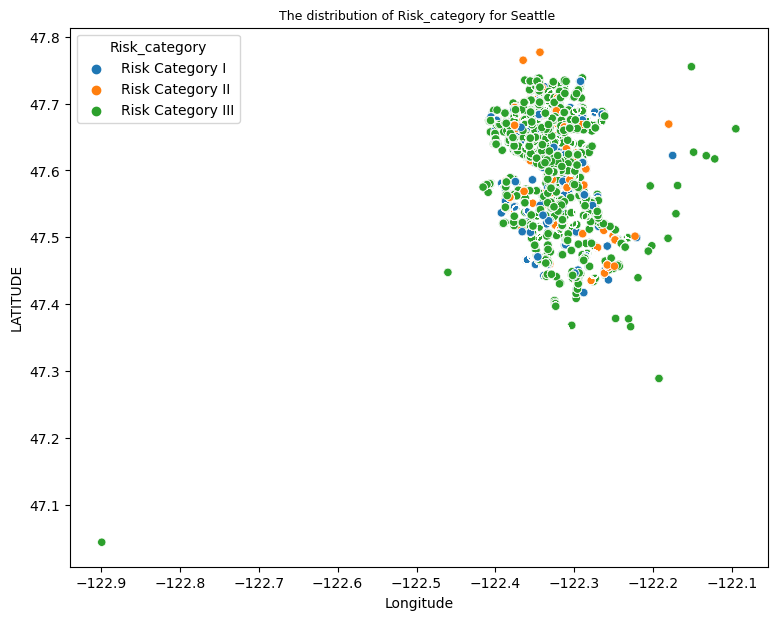

In [92]:
fig,ax=plt.subplots(figsize=(9,7))
sns.scatterplot(x='Longitude',y='Latitude',hue='Risk_category',hue_order=['Risk Category I','Risk Category II','Risk Category III'] ,data=data1, ax=ax)
ax.set_title("The distribution of Risk_category for Seattle ",size=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')

توزیع ریسک  برای شهر سیاتل 

Text(0, 0.5, 'LATITUDE')

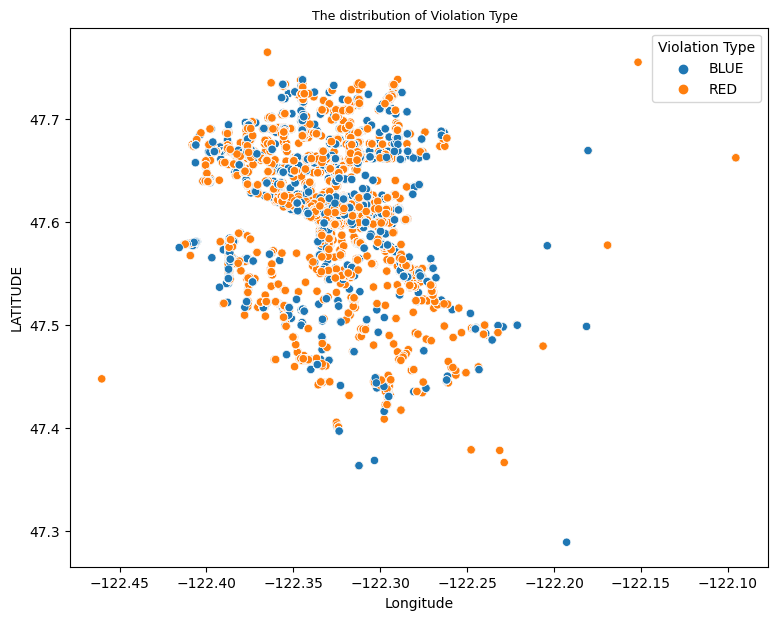

In [160]:
fig,ax=plt.subplots(figsize=(9,7))
sns.scatterplot(x='Longitude',y='Latitude',hue='Violation Type',hue_order=['BLUE','RED'] ,data=data1, ax=ax)
ax.set_title("The distribution of Violation Type  ",size=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('LATITUDE')

توزیع نوع تخلف نشان داده شده است

In [154]:
df5= df.groupby(["Violation Description","Violation Type"])["City"].agg('count').unstack('Violation Type')
df5

Violation Type,BLUE,RED
Violation Description,,
"0100 - PIC certified by accredited program or compliance with code, or correct answers",NaN,327.0
0100 - PIC certified by accredited program...,NaN,64.0
"0100 - PIC certified by accredited programor compliance with code, or correct answers",NaN,1.0
"0100 - PIC present, demonstrates knowledge and performs duties to maintain AMC; certified manager on",NaN,16.0
0200 - Food Worker Cards current for all food workers; new food workers trained,NaN,4867.0
...,...,...
"Utensils, equipment, linens properly stored,...",84.0,NaN
Variance obtained for specialized processing ...,NaN,4.0
"Warewashing facilities properly installed,...",893.0,NaN
